In [235]:
import torch
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import timm
import argparse
import models_vit
import numpy as np
from util.misc import NativeScalerWithGradNormCount as NativeScaler
from util.lars import LARS
import util.misc as misc
import os
import matplotlib.pyplot as plt
import torchvision.transforms.functional as F
import sys
from pytorch_grad_cam import GradCAM, ScoreCAM, GradCAMPlusPlus, AblationCAM, XGradCAM
from pytorch_grad_cam.utils.image import show_cam_on_image
from pytorch_grad_cam import DeepFeatureFactorization

In [73]:
sys.path.append('./pytorch-grad-cam-master')

In [ ]:
def reshape_transform(tensor, height=14, width=14):
    result = tensor[:, 1 :  , :].reshape(tensor.size(0),
        height, width, tensor.size(2))

    # Bring the channels to the first dimension,
    # like in CNNs.
    result = result.transpose(2, 3).transpose(1, 2)
    return result

In [51]:
def show(imgs):
    if not isinstance(imgs, list):
        imgs = [imgs]
    fig, axs = plt.subplots(ncols=len(imgs), squeeze=False)
    for i, img in enumerate(imgs):
        img = img.detach()
        img = F.to_pil_image(img)
        axs[0, i].imshow(np.asarray(img))
        axs[0, i].set(xticklabels=[], yticklabels=[], xticks=[], yticks=[])

In [42]:
os.getcwd()

'C:\\Users\\kcs163\\works\\git_repos\\ADL-MAE\\practise\\final'

In [237]:
class Args:
    model = 'vit_base_patch16'
    weight_decay = 0
    lr = None
    resume = '../tmp/checkpoint/checkpoint-100_naug.pth'
    eval = True
    data_path = '../mae-main/dataset/imagenette2-320/'
args = Args()

In [238]:
model = models_vit.__dict__[args.model]( num_classes=10,  global_pool=False)
model.head = torch.nn.Sequential(torch.nn.BatchNorm1d(model.head.in_features, affine=False, eps=1e-6), model.head)

In [277]:
optimizer = LARS(model.head.parameters(), lr=args.lr, weight_decay=args.weight_decay)
loss_scaler = NativeScaler()
misc.load_model(args=args, model_without_ddp=model, optimizer=optimizer, loss_scaler=loss_scaler)
model.eval()
print(1)

Resume checkpoint ../tmp/checkpoint/checkpoint-100_naug.pth
1


In [270]:
#optimizer = LARS(model.head.parameters(), lr=args.lr, weight_decay=args.weight_decay)
#print(optimizer)
#loss_scaler = NativeScaler()
checkpoint = torch.load(args.resume, map_location='cpu')
model.load_state_dict(checkpoint['model'])
#misc.load_model(args=args, model_without_ddp=model, optimizer=optimizer, loss_scaler=loss_scaler)
#model.eval()
print(1)

1


In [271]:
transform_val = transforms.Compose([
        #transforms.Resize(256, interpolation=3),
        #transforms.CenterCrop(224),
        transforms.Resize((224,224), interpolation=3),
        transforms.ToTensor(),
        #transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])
dataset_val = datasets.ImageFolder(os.path.join(args.data_path, 'val'), transform=transform_val)
data_loader_val = torch.utils.data.DataLoader( dataset_val, batch_size=1, num_workers=0, drop_last=False)

In [272]:
#Can be GradCAM, ScoreCAM, GradCAMPlusPlus, AblationCAM, XGradCAM
cam = GradCAM(model=model, target_layers=[model.blocks[-1].norm1], reshape_transform=reshape_transform, use_cuda=True)

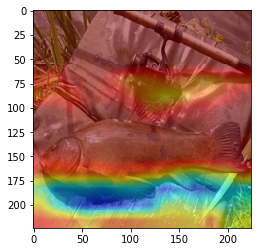

In [278]:
i = 0
img0 = dataset_val[i][0]
img = img0.permute(1,2,0)
grayscale_cam = cam(input_tensor=img0[None,:], targets=None, eigen_smooth= True, aug_smooth=True)
visualization = show_cam_on_image(img.numpy(), grayscale_cam.squeeze())
plt.imshow(visualization, interpolation='nearest')

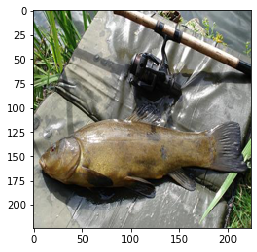

In [275]:
plt.imshow(img, interpolation='nearest')

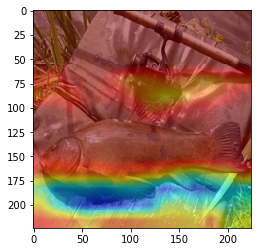

In [276]:
plt.imshow(visualization, interpolation='nearest')

In [107]:
import cv2
from pytorch_grad_cam.utils.image import show_cam_on_image, preprocess_image

In [152]:
#rgb_img = cv2.imread(r"C:\Users\kcs163\works\git_repos\ADL-MAE\practise\mae-main\dataset\imagenette2-320\val\n01440764\ILSVRC2012_val_00009111.JPEG", 1)[:, :, ::-1]
#rgb_img = cv2.resize(rgb_img, (224, 224))
#rgb_img = np.float32(rgb_img) / 255
#input_tensor = preprocess_image(rgb_img, mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])

In [184]:
input_tensor.shape

torch.Size([1, 3, 224, 224])

In [149]:
#cv2.imshow('a', visualization)
#cv2.waitKey(0)
#cv2.destroyAllWindows()

In [162]:
img.shape, rgb_img.shape, input_tensor.shape

(torch.Size([3, 224, 224]), (224, 224, 3), torch.Size([1, 3, 224, 224]))

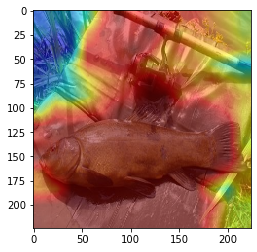

In [159]:
plt.imshow(visualization, interpolation='nearest')

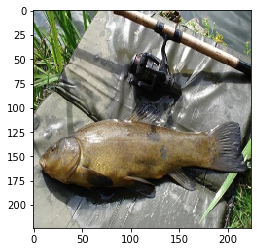

In [157]:
plt.imshow(rgb_img, interpolation='nearest')

In [145]:
visualization.shape

(224, 224, 3)

In [143]:
rgb_img.shape

(224, 224, 3)

In [109]:
input_tensor.shape

torch.Size([1, 3, 224, 224])

In [119]:
rgb_img1 = cv2.imread(r"C:\Users\kcs163\works\git_repos\ADL-MAE\practise\mae-main\dataset\imagenette2-320\val\n01440764\ILSVRC2012_val_00009111.JPEG", 1)[:, :, ::-1]
rgb_img1 = cv2.resize(rgb_img1, (224, 224))

In [130]:
grayscale_cam.squeeze().shape

(224, 224)

In [121]:
rgb_img.shape

(224, 224, 3)

In [124]:
input_tensor.squeeze().shape

torch.Size([3, 224, 224])

In [132]:
heatmap = cv2.applyColorMap(np.uint8(255 * grayscale_cam.squeeze()), cv2.COLORMAP_JET)
heatmap = np.float32(heatmap) / 255

In [ ]:
cam = (1 - image_weight) * heatmap + image_weight * img

In [127]:
gray_img = cv2.imread(r"C:\Users\kcs163\works\git_repos\ADL-MAE\practise\mae-main\dataset\imagenette2-320\val\n01440764\ILSVRC2012_val_00009111.JPEG", cv2.IMREAD_GRAYSCALE)

In [128]:
gray_img.shape

(320, 426)

In [39]:
param = [k.requires_grad for k in model.parameters()]
len(param), np.sum(param)

(152, 152)

In [22]:
for k in model.parameters():
    print(k.requires_grad)
    break

True
